In [1]:
# Nguyễn Hữu Thâu - 19146265
# MSSV: 19146265
# Lớp chiều thứ 5, tiết 10-12

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [4]:
# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_pre = x_test[0]
y_pre = y_test[0]

# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.8314 - acc: 0.7579 - val_loss: 0.3799 - val_acc: 0.8943
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3653 - acc: 0.8967 - val_loss: 0.3095 - val_acc: 0.9098
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3190 - acc: 0.9099 - val_loss: 0.2849 - val_acc: 0.9186
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2989 - acc: 0.9158 - val_loss: 0.2724 - val_acc: 0.9228
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2848 - acc: 0.9191 - val_loss: 0.2658 - val_acc: 0.9244
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2750 - acc: 0.9222 - val_loss: 0.2597 - val_acc: 0.9266
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2672 - acc: 0.9253 - val_loss: 0.2592 - val_acc: 0.9268
Epoch 8/10
375/375 [==============================] - 2s 4ms/step - loss: 0.

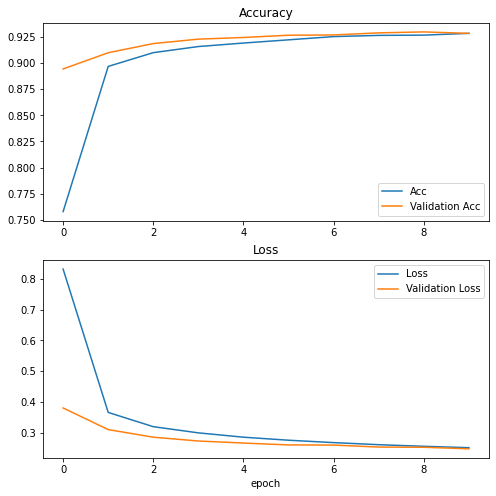

In [5]:
#CREATE MODEL
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer =Adam(), metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2)

plot_history(history)

Epoch 1/5
375/375 [==============================] - 5s 10ms/step - loss: 1.2165 - acc: 0.6092 - val_loss: 0.5305 - val_acc: 0.8482
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.4739 - acc: 0.8634 - val_loss: 0.4025 - val_acc: 0.8847
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3884 - acc: 0.8883 - val_loss: 0.3472 - val_acc: 0.9003
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.3426 - acc: 0.9020 - val_loss: 0.3220 - val_acc: 0.9075
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3123 - acc: 0.9108 - val_loss: 0.3177 - val_acc: 0.9061


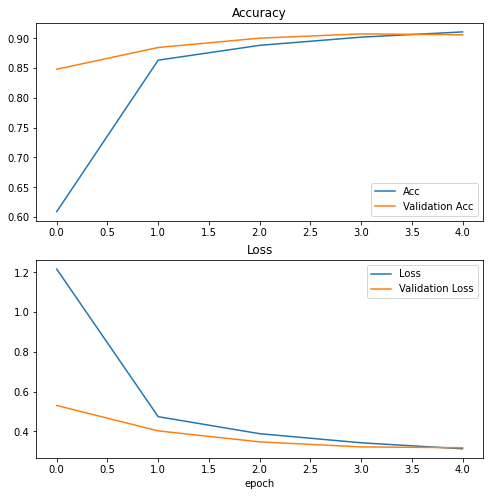

In [7]:
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_shape = (784,)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer =Adam(), metrics=['acc'])

history1 = model1.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_split = 0.2)

plot_history(history1)

Epoch 1/5
375/375 [==============================] - 4s 9ms/step - loss: 1.6053 - acc: 0.3677 - val_loss: 1.0621 - val_acc: 0.6341
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.8236 - acc: 0.7290 - val_loss: 0.6487 - val_acc: 0.7989
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.5784 - acc: 0.8333 - val_loss: 0.5205 - val_acc: 0.8503
Epoch 4/5
375/375 [==============================] - 2s 6ms/step - loss: 0.4839 - acc: 0.8640 - val_loss: 0.4601 - val_acc: 0.8729
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 0.4340 - acc: 0.8772 - val_loss: 0.4155 - val_acc: 0.8850


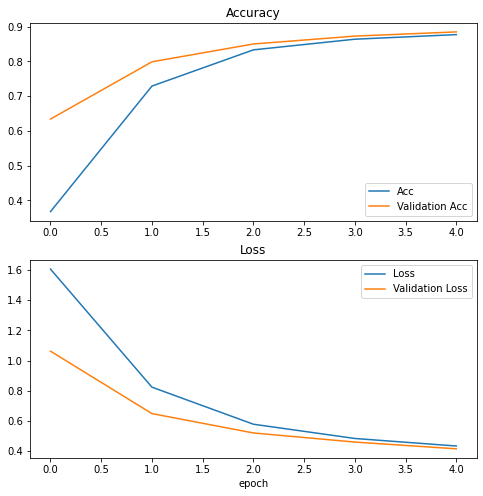

In [8]:
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape = (784,)))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer =Adam(), metrics=['acc'])

history2 = model2.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_split = 0.2)

plot_history(history2)

In [9]:
loss_dict = {
  "1-10": history.history['val_acc'],
  "5-10": history1.history['val_acc'],
  "10-10": history2.history['val_acc']
}

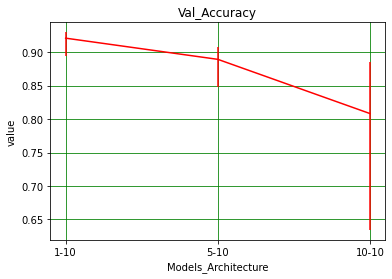

In [10]:
# plot error bar
x = []
y = []
yerr = []
for k, v in loss_dict.items():
    x.append(k)
    y.append(np.mean(v))  # compute mean
    yerr.append([np.mean(v) - min(v), max(v) - np.mean(v)])  # use max and min as upper and lower bound

yerr = np.transpose(yerr)  # yerr should be 2xN matrix
plt.errorbar(x, y, yerr=yerr, color='r')
plt.xlabel("Models_Architecture")
plt.ylabel('value')
plt.title("Val_Accuracy")
plt.grid(b=True, color='g')
plt.show()

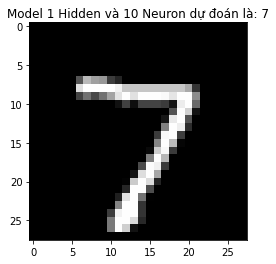

In [12]:
plt.title("Model 1 Hidden và 10 Neuron dự đoán là: " + str(np.argmax(model1.predict(x_pre.reshape((-1,28*28))))))
plt.imshow(x_pre, cmap=plt.get_cmap('gray'))